# Distributed feature selection - *distfeatselect*
## Introduction
This algorithm is designed to perform feature selection on a given dataset using distributed scheme logic [[1]](https://link.springer.com/article/10.1007/s10994-019-05809-y). The goal is to help users streamline their feature selection process, potentially improving model performance and reducing dimensionality.

## Overview
The custom feature selection algorithm DFS is implemented as a scikit-learn-compatible transformer, following the scikit-learn API standards. It can be seamlessly integrated into scikit-learn workflows, allowing users to incorporate distributed feature selection into their machine learning pipelines.

## Usage
In this section, we will demonstrate how to use the dfs package and some of its functionality.
This example uses the Breast Cancer Wisconsin (Diagnostic) Data Set (WDBC) dataset available [here](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).

First, we import several essential Python libraries.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [ ]:
#change package import
from dfsc import DFSC
from rfsc import RFSC
import utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.2 MB/s eta 0:00:00


Then we'll import the data:

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

In [ ]:
y["Diagnosis"].replace({'M': 1, 'B': 0}, inplace=True)

<ipython-input-19-366129d1ada6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Diagnosis"].replace({'M': 1, 'B': 0}, inplace=True)


We can preview the dataset:

In [ ]:
X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


As an additional step, we highly recommend performing correlation analysis and removing desired correlated features.
In this example, a correlation heatmap is plotted to find highly correlated features and remove them.

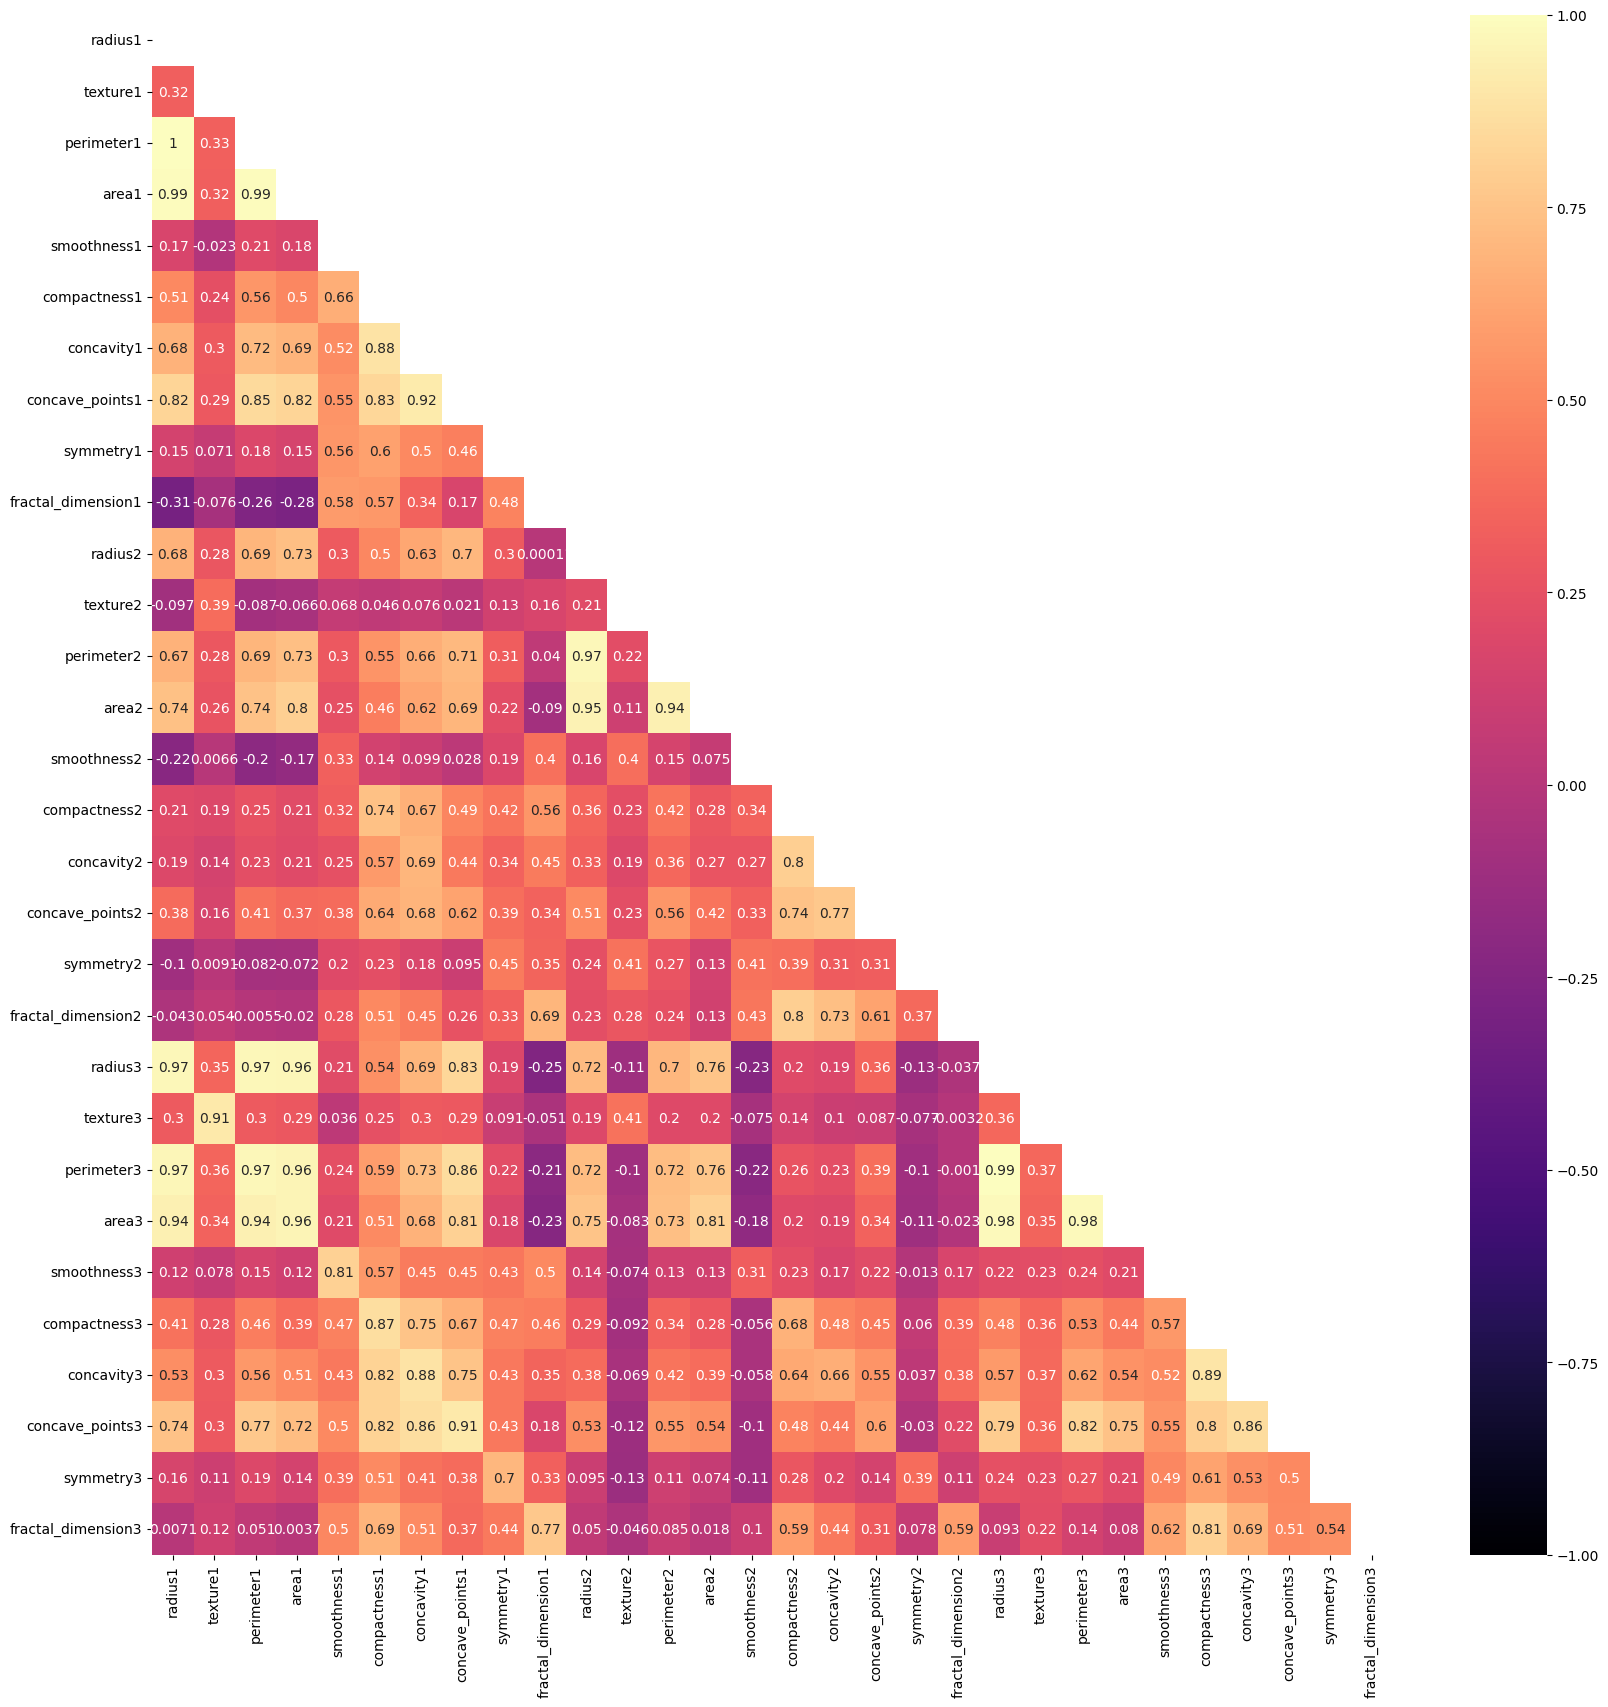

In [ ]:
import seaborn as sns # seaborn not included as dfsc dependency
import matplotlib.pyplot as plt #pyplot not included as dfsc dependency

plt.figure(figsize=(20,20))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(X.corr(), dtype=bool))

# generate heatmap
sns.heatmap(X.corr(), annot=True, mask=mask, vmin=-1, vmax=1, cmap='magma')
plt.show()

Using information from the heatmap we can optionally remove all the highly correlated features.

In [ ]:
#coldrop = ['radius1', 'concave_points1'] identify all the features that are highly correlated and add them to the list of features to be dropped
#X = X.drop(columns=coldrop)

The data is then segmented into training and testing portions to be utilized by DFSC. This standard process is carried out using scikit-learn's train_test_split function.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Preprocessing  - we can incorporate various preprocessing steps using standard methods and packages such as [sklearn.preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data). Here, we scaled the data using MinMaxScaler.

In [ ]:
minmax = MinMaxScaler(feature_range=(0, 1))
X_train = minmax.fit_transform(X_train)
X_test = minmax.fit_transform(X_test)

## Example of typical usage

DFSC follows the sklearn model API. We create an instance of the DFSC class and then call its methods.

We fit the model by instantiating a new *DFSC* object. All wanted settings are passed into the constructor.
Then you call its *fit* method and pass in the training data and corresponding labels.

*More details about settings (the parameters) available for the DFSC constructor are available in the docstrings, for example, via help(DFSC), help(DFSC.fit) ...*

In [ ]:
dfs = DFSC(n_vbins=2, n_hbins=1, n_runs=5, redistribute_features=True)

model = dfs.fit(X_train, y_train)

New best model for hbin 0. roc_auc=0.9195 -- Model features [2, 26, 27]
New best model for hbin 0. roc_auc=0.92301 -- Model features [6, 7, 23]
All horizontal partitions have converged. Final iter count: 3
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6538603562809436
            Iterations: 45
            Function evaluations: 45
            Gradient evaluations: 45


Now, we can get a mask, or integer index, of the features selected. We call *get_support* method. Here, we call it with True as a parameter and the return value will be an array of integers.

In [ ]:
selected_features = dfs.get_support(True)

If we want to reduce the dataset to the selected features, we call *transform* method.




In [ ]:
X_train_transformed = dfs.transform(X_train)
X_test_transformed = dfs.transform(X_test)

We can now do a standard process for the task of classification using whatever classifier and metrics we want.

In [ ]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_transformed, y_train)

y_pred = svm_classifier.predict(X_test_transformed)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)

print(f"Selected features {selected_features}\n")
print(f"Accuracy {accuracy} \n")

Selected features [6, 7, 23]

Accuracy 0.9210526315789473 



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Example of using Random Feature Selection (*RFSC*)
 ***RFSC* as a base (local) feature selection algorithm inside distributed scheme (*DFSC*)**

RFSC can be used as a feature selection algorithm on its own or as shown below as a base fs algorithm for DFSC.

First, we instantiate a new RFSC object using distance correlation as a method.
We also set number of models as 300, number of iterations as 100 and rip threshold for feature inclusion in the final model as 0.9.

*More details about settings (the parameters) available for RFSC constructor are available in the docstrings, for example, via help(RFSC).*

In [ ]:
rfsc = RFSC(n_models=300, n_iters=100, rip_cutoff=0.9, method = "dcor")

Now, we set rfsc as a local_fs_method in new DFSC object and continue the same as shown in previous example. Instead of rfsc, we could also set local_fs_method to be some other custom or wellknown feature selection algorithm. The only prerequisite for that is that the algorithm follows the sklearn API standards.

In [ ]:
dfs = DFSC(n_vbins=3, n_hbins= 2, n_runs= 10, max_processes= 6, local_fs_method= rfsc, redistribute_features= True)

model = dfs.fit(X_train, y_train)
features = dfs.get_support(True)

Tol reached. Number of features above rip_cutoff is 2
Tol reached. Number of features above rip_cutoff is 2
New best model for hbin 0. roc_auc=0.85307 -- Model features [20, 23, 27]
New best model for hbin 1. roc_auc=0.85997 -- Model features [20, 23, 27]
New best model for hbin 0. roc_auc=0.85724 -- Model features [7, 20, 22, 27]
New best model for hbin 1. roc_auc=0.86494 -- Model features [7, 20, 22, 23, 27]
New best model for hbin 1. roc_auc=0.86551 -- Model features [10, 20, 22, 27]
New best model for hbin 0. roc_auc=0.85795 -- Model features [7, 10, 20, 22, 26, 27]
New best model for hbin 0. roc_auc=0.85795 -- Model features [0, 7, 10, 20, 27]
All horizontal partitions have converged. Final iter count: 5
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6648857607403571
            Iterations: 64
            Function evaluations: 64
            Gradient evaluations: 64


To reduce dataset to the selected features, we call *transform* method.

In [ ]:
X_train_transformed = dfs.transform(X_train)
X_test_transformed = dfs.transform(X_test)

We can now do standard process for the task of classification using whatever classifier and metrics we want.

In [ ]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_transformed, y_train)

y_pred = svm_classifier.predict(X_test_transformed)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)

print(f"Selected features {selected_features}\n")
print(f"Accuracy {accuracy} \n")

Selected features [6, 7, 23]

Accuracy 0.9649122807017544 



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Example of using the algorithm with [sklearn.pipeline.Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn-pipeline-pipeline) and [sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)  

We can also incorporate either of this two algorithms RFSC or DFSC into sklearn pipeline and do the hyperparameters tuning using GridSearchCV as shown in the following example.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

Define the parameter grid for hyperparameter tuning.

In [ ]:
param_grid = {
    'custom_feature_selector__n_iters': [1, 5, 10],
    'custom_feature_selector__n_models': [2, 100]
}

Create the pipeline with RFSC as a custom feature selector.


In [ ]:
custom_feature_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('custom_feature_selector', RFSC()),
    ('classifier', LogisticRegression())
])

Create the GridSearchCV object.


In [ ]:
grid_search = GridSearchCV(custom_feature_pipeline, param_grid, cv=5)

Fit the GridSearchCV object to the data


In [ ]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.17227309557258152
            Iterations: 28
            Function evaluations: 28
            Gradient evaluations: 28


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6930983085060678
            Iterations: 4
            Function evaluations: 4
            Gradient evaluations: 4


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.20752797796418884
            Iterations: 28
            Function evaluations: 28
            Gradient evaluations: 28
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2135744463242009
            Iterations: 29
            Function evaluations: 29
            Gradient evaluations: 29


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.18281872249362574
            Iterations: 27
            Function evaluations: 27
            Gradient evaluations: 27


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.05216183248128743
            Iterations: 367
            Function evaluations: 367
            Gradient evaluations: 367


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.04853844876029911
            Iterations: 377
            Function evaluations: 377
            Gradient evaluations: 377


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.02608758598066071
            Iterations: 354
            Function evaluations: 354
            Gradient evaluations: 354


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.05194132852410427
            Iterations: 360
            Function evaluations: 360
            Gradient evaluations: 360


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.06294157220025119
            Iterations: 279
            Function evaluations: 279
            Gradient evaluations: 279
Tol reached. Number of features above rip_cutoff is 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24046769492572892
            Iterations: 26
            Function evaluations: 26
            Gradient evaluations: 26


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Tol reached. Number of features above rip_cutoff is 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2688917251123082
            Iterations: 29
            Function evaluations: 29
            Gradient evaluations: 29
Tol reached. Number of features above rip_cutoff is 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.26566870942980364
            Iterations: 23
            Function evaluations: 23
            Gradient evaluations: 23


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Tol reached. Number of features above rip_cutoff is 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.29626930995153766
            Iterations: 29
            Function evaluations: 29
            Gradient evaluations: 29
Tol reached. Number of features above rip_cutoff is 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.25635006087316514
            Iterations: 22
            Function evaluations: 22
            Gradient evaluations: 22


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.06935474646672818
            Iterations: 272
            Function evaluations: 272
            Gradient evaluations: 272


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.13283846381306924
            Iterations: 92
            Function evaluations: 92
            Gradient evaluations: 92


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.04200354978783453
            Iterations: 255
            Function evaluations: 255
            Gradient evaluations: 255


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.06708221166826271
            Iterations: 255
            Function evaluations: 255
            Gradient evaluations: 255


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.07261017251848846
            Iterations: 187
            Function evaluations: 188
            Gradient evaluations: 187
Tol reached. Number of features above rip_cutoff is 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.16166636878889865
            Iterations: 28
            Function evaluations: 28
            Gradient evaluations: 28


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Tol reached. Number of features above rip_cutoff is 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.28569272721913597
            Iterations: 26
            Function evaluations: 26
            Gradient evaluations: 26
Tol reached. Number of features above rip_cutoff is 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.19099511927926552
            Iterations: 18
            Function evaluations: 18
            Gradient evaluations: 18


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Tol reached. Number of features above rip_cutoff is 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1901904167472314
            Iterations: 18
            Function evaluations: 18
            Gradient evaluations: 18
Tol reached. Number of features above rip_cutoff is 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3910177420568144
            Iterations: 22
            Function evaluations: 22
            Gradient evaluations: 22


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.06528695004772853
            Iterations: 229
            Function evaluations: 229
            Gradient evaluations: 229


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.10197033913379423
            Iterations: 209
            Function evaluations: 209
            Gradient evaluations: 209


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.049582810956811926
            Iterations: 244
            Function evaluations: 244
            Gradient evaluations: 244


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.10677563312402162
            Iterations: 47
            Function evaluations: 47
            Gradient evaluations: 47


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.10243937174370334
            Iterations: 115
            Function evaluations: 115
            Gradient evaluations: 115


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.16899557742403185
            Iterations: 46
            Function evaluations: 46
            Gradient evaluations: 46


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('custom_feature_selector', RFSC()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'custom_feature_selector__n_iters': [1, 5, 10],
                         'custom_feature_selector__n_models': [2, 100]})

Get the best parameters and best score from the grid search.

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.49697638380254067
            Iterations: 29
            Function evaluations: 29
            Gradient evaluations: 29
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.36438666649585844
            Iterations: 27
            Function evaluations: 27
            Gradient evaluations: 27
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.530896047394285
            Iterations: 19
            Function evaluations: 19
            Gradient evaluations: 19
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.20079780165762337
            Iterations: 46
            Function evaluations: 46
            Gradient evaluations: 46
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.21500561143712812
            Iterations: 38
            Function 

[1] Brankovic, A., Piroddi, L. (2019). [A distributed feature selection scheme with partial information sharing](https://link.springer.com/article/10.1007/s10994-019-05809-y)